<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Function

In [3]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
bdd = pd.DataFrame(data['data'], columns=data['feature_names'])

# Ajout de la colonne cible
bdd['target'] = data['target']

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Le 0 correspond donc a maligne = tumeur cancéreuse tandis que 1 correspond à bénin = tumeur non cancéreuse

##### Statistiques descriptives

In [9]:
bdd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


##### Typage des données

In [10]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### Valeurs manquantes

In [11]:
bdd.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### Standardisation

Étant donné les écarts d'échelle significatifs entre les variables de notre dataset, il est essentiel de les standardiser dès cette étape. La standardisation permet de ramener toutes les variables à une échelle comparable, en centrant les données autour de zéro avec une variance unitaire. Cela est particulièrement important pour garantir que les algorithmes de machine learning, sensibles aux échelles des données fonctionnent de manière optimale et produisent des résultats fiables.

In [12]:
X = bdd.drop(columns=['target']) 
y = bdd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

###### Statistiques univariées

1    357
0    212
Name: target, dtype: int64


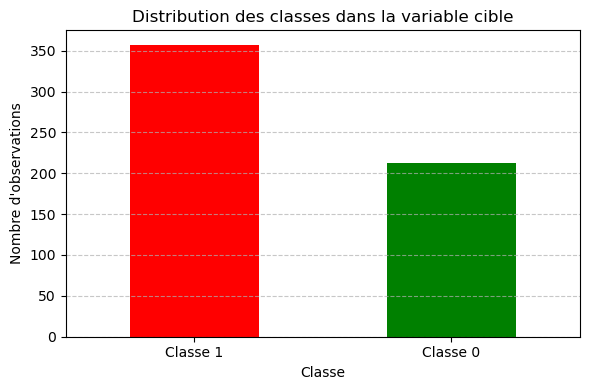

In [13]:
distribution = bdd['target'].value_counts()

# Affichage de la distribution
print(distribution)

# Visualisation
plt.figure(figsize=(6, 4))
distribution.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution des classes dans la variable cible')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Classe 1', 'Classe 0'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nous avons donc plus (+) de cas de tumeur non cancéreuse c'est-à-dire bénine.

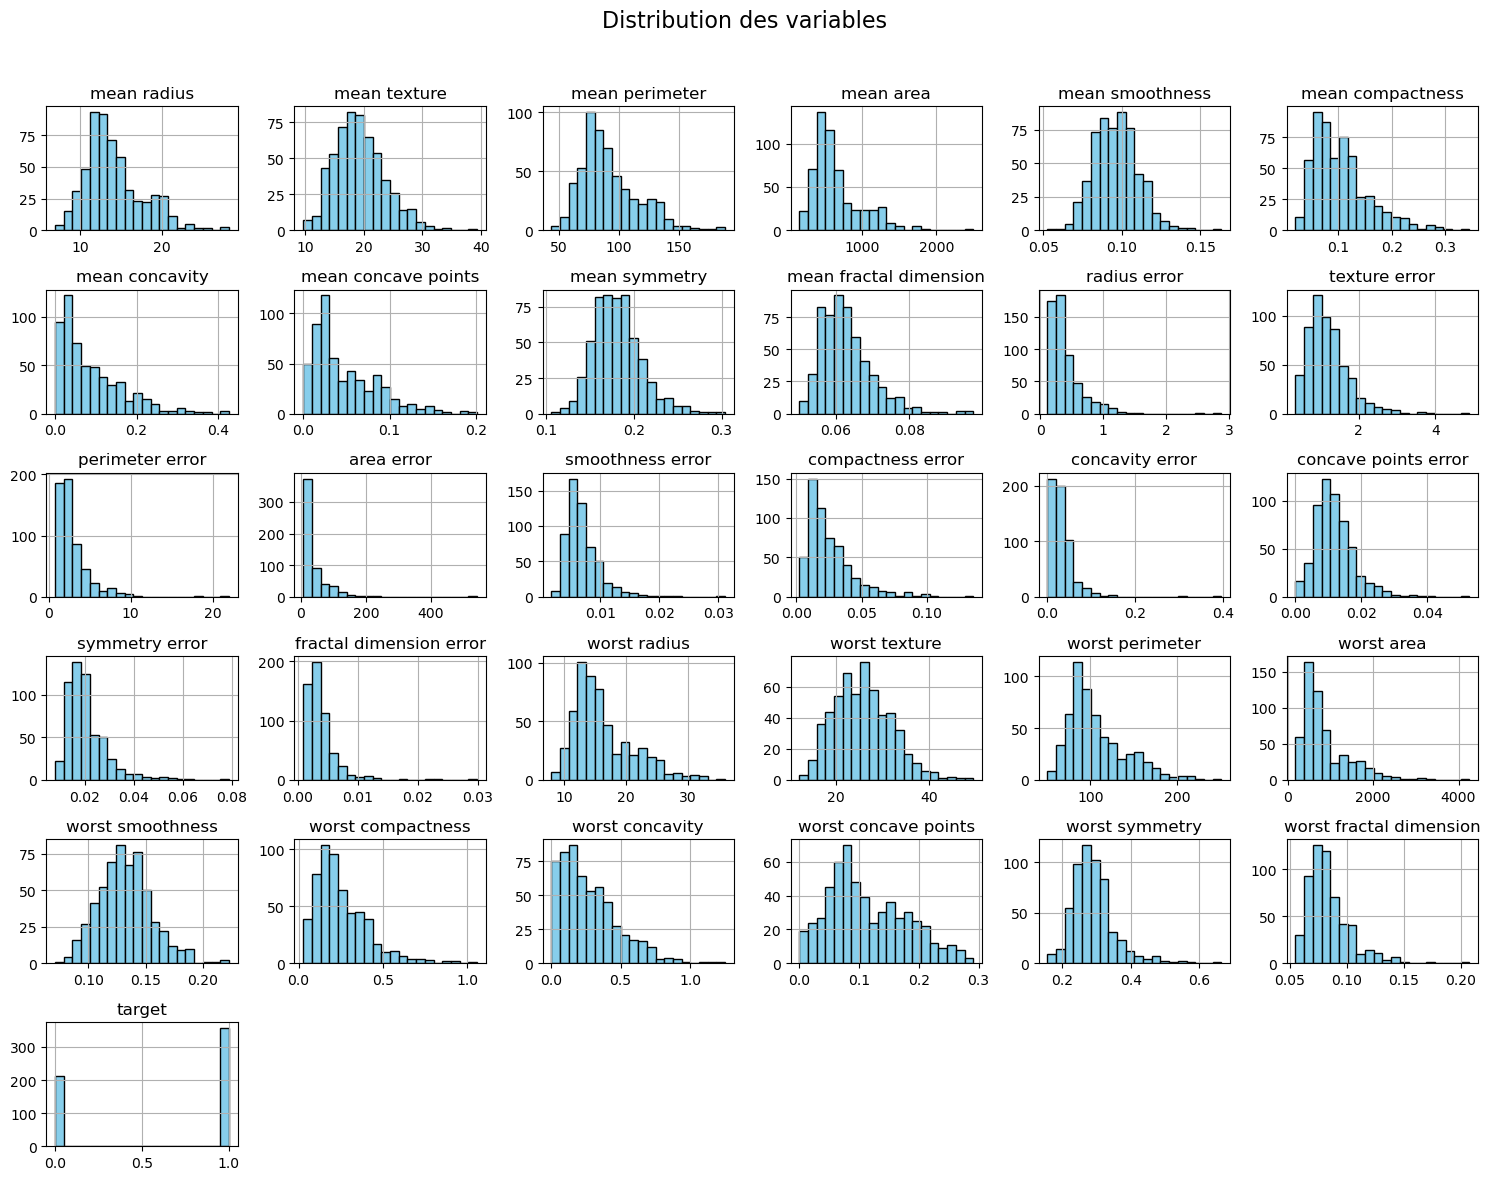

In [14]:
bdd.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

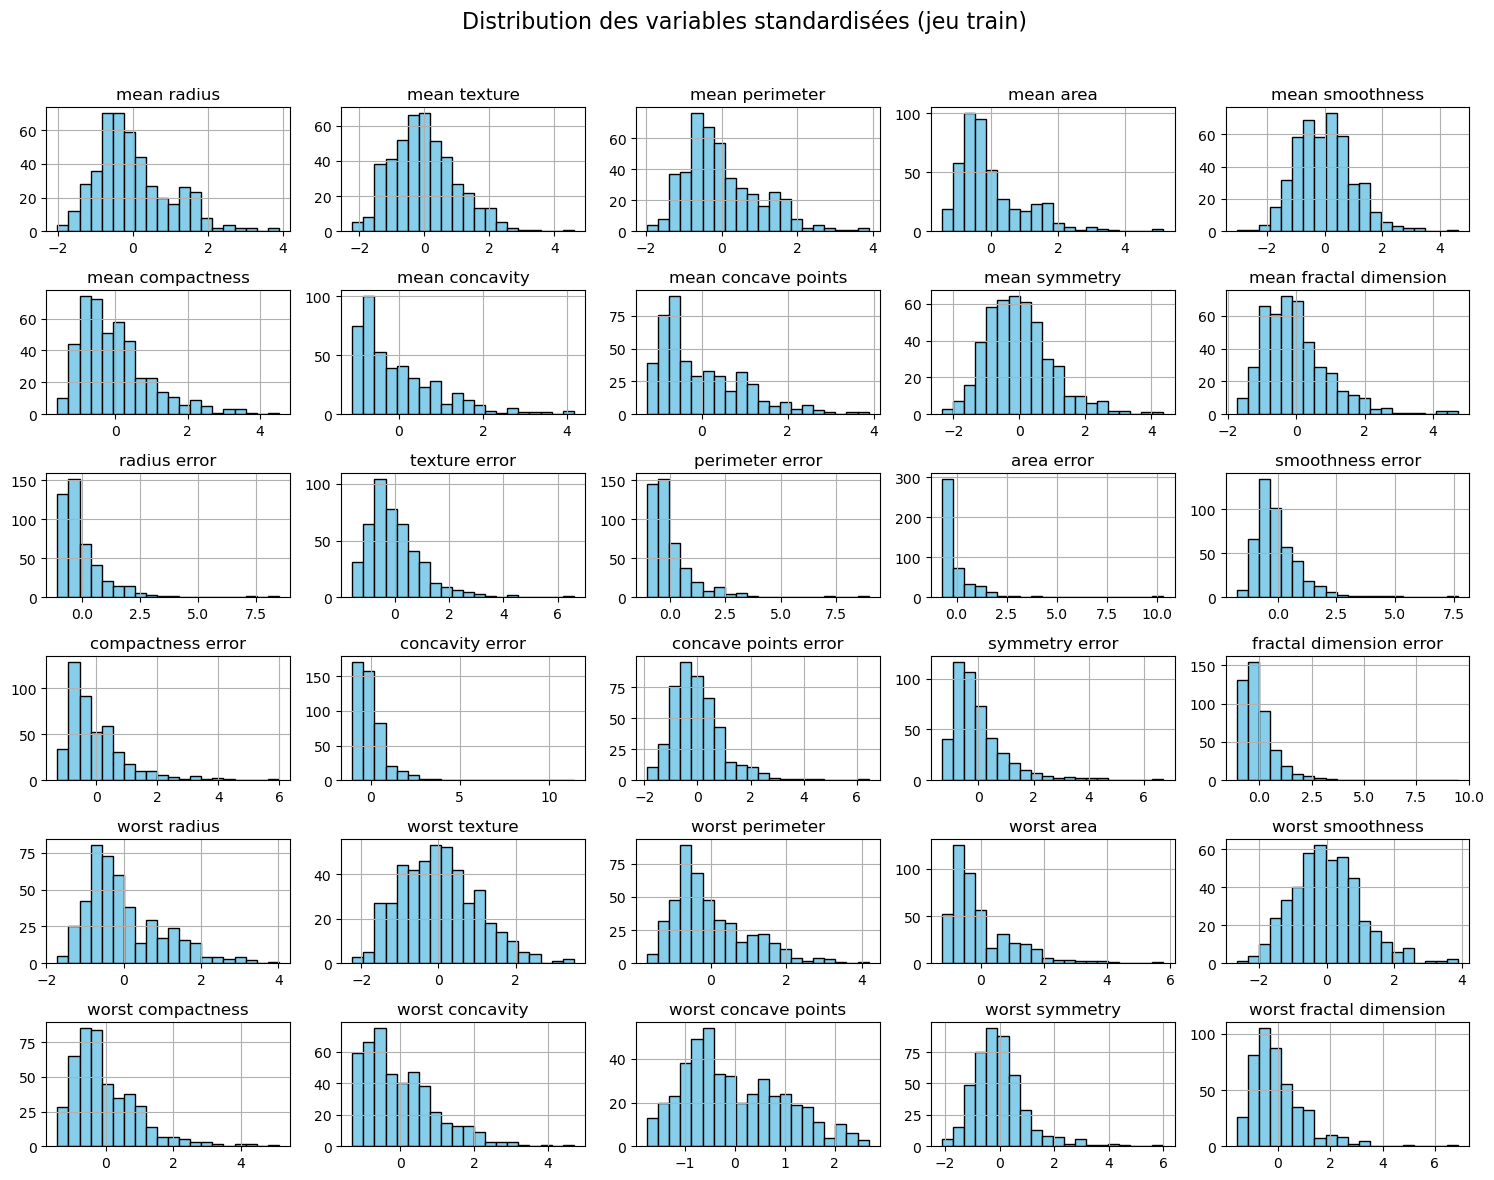

In [15]:
X_train_scaled.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables standardisées (jeu train)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###### Statistiques bivariées

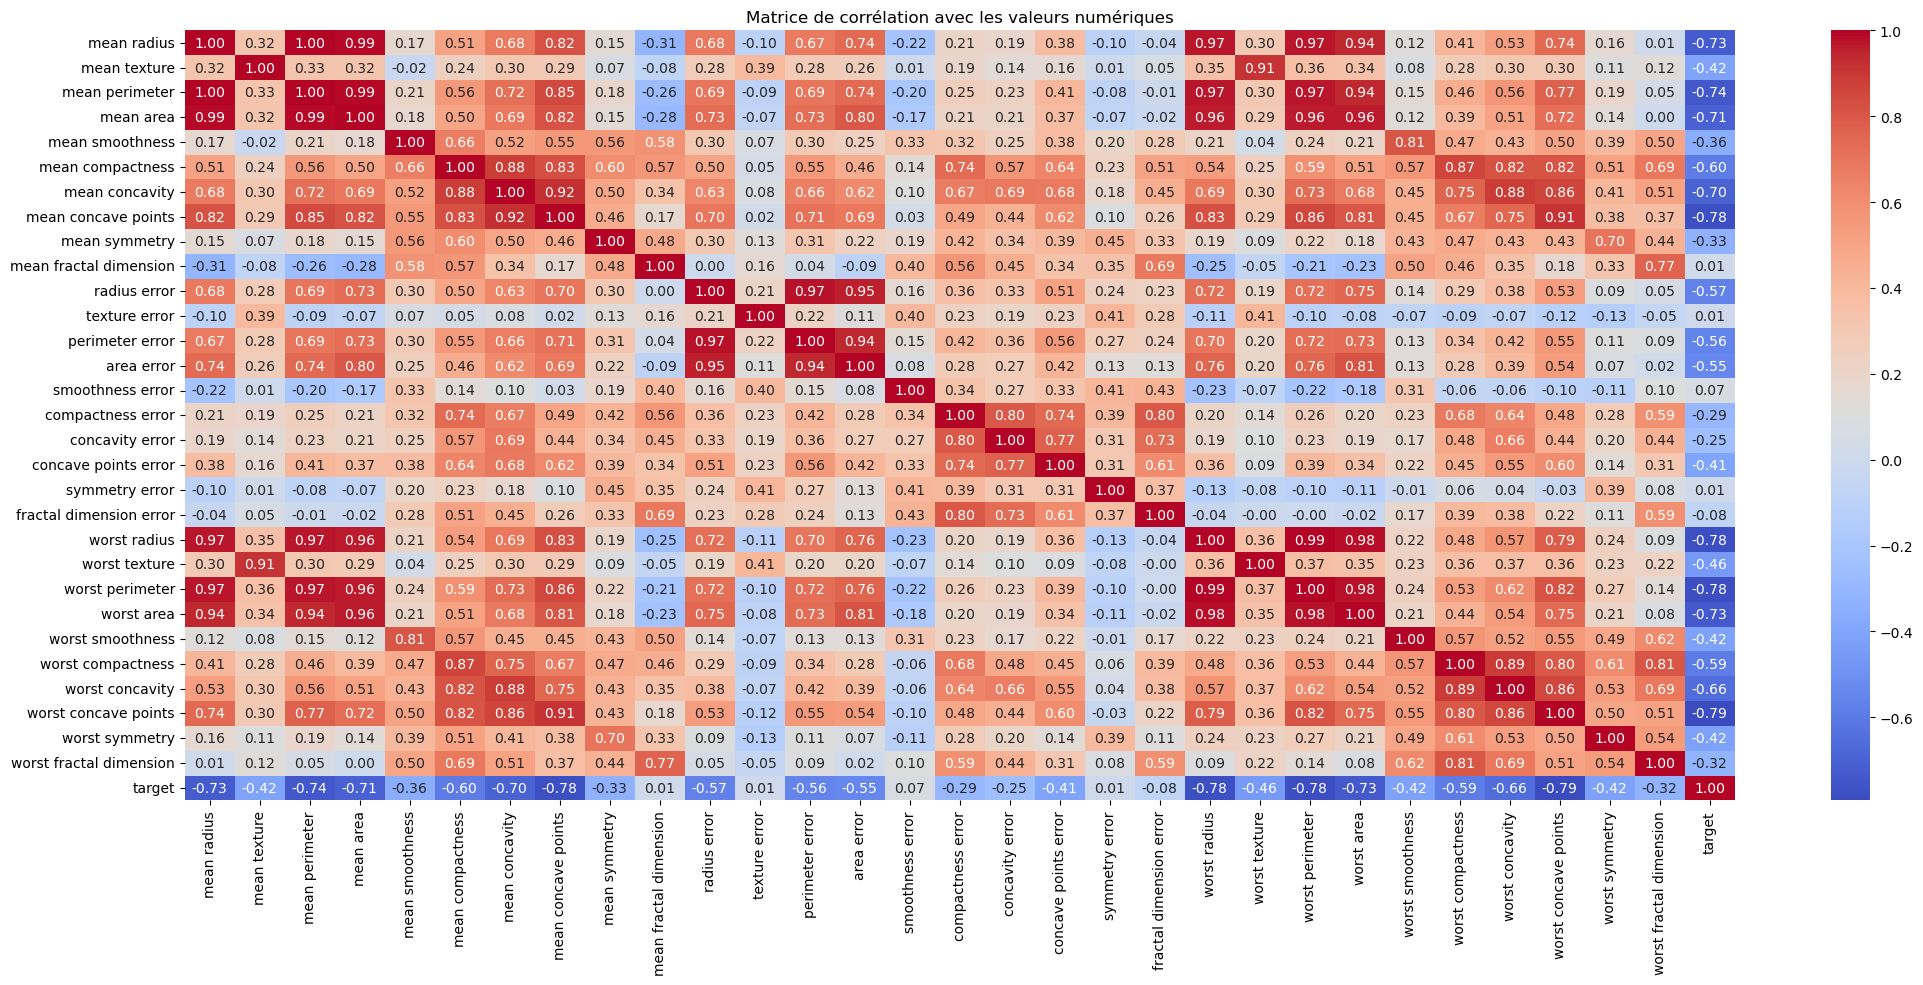

In [16]:
correlation_matrix = bdd.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation avec les valeurs numériques")
plt.show()

La présence de corrélations dans un modèle SVM n'est pas nécessairement problématique. En effet, les SVM peuvent généralement gérer une certaine corrélation entre les variables sans que cela nuise à la performance du modèle. Cependant, si des corrélations extrêmement fortes entre certaines variables sont observées, cela pourrait indiquer que ces variables contiennent des informations redondantes, voire identiques. Dans ce cas, il pourrait être judicieux d'éliminer certaines de ces variables pour simplifier le modèle et éviter l'overfitting tout en conservant la pertinence des informations.

Ainsi, nous prendrons en compte ces corrélations dans le cadre de notre analyse, particulièrement lors de la sélection des features. Ce processus de sélection des variables nous permettra de réduire les redondances tout en conservant les informations essentielles pour améliorer la performance du modèle.

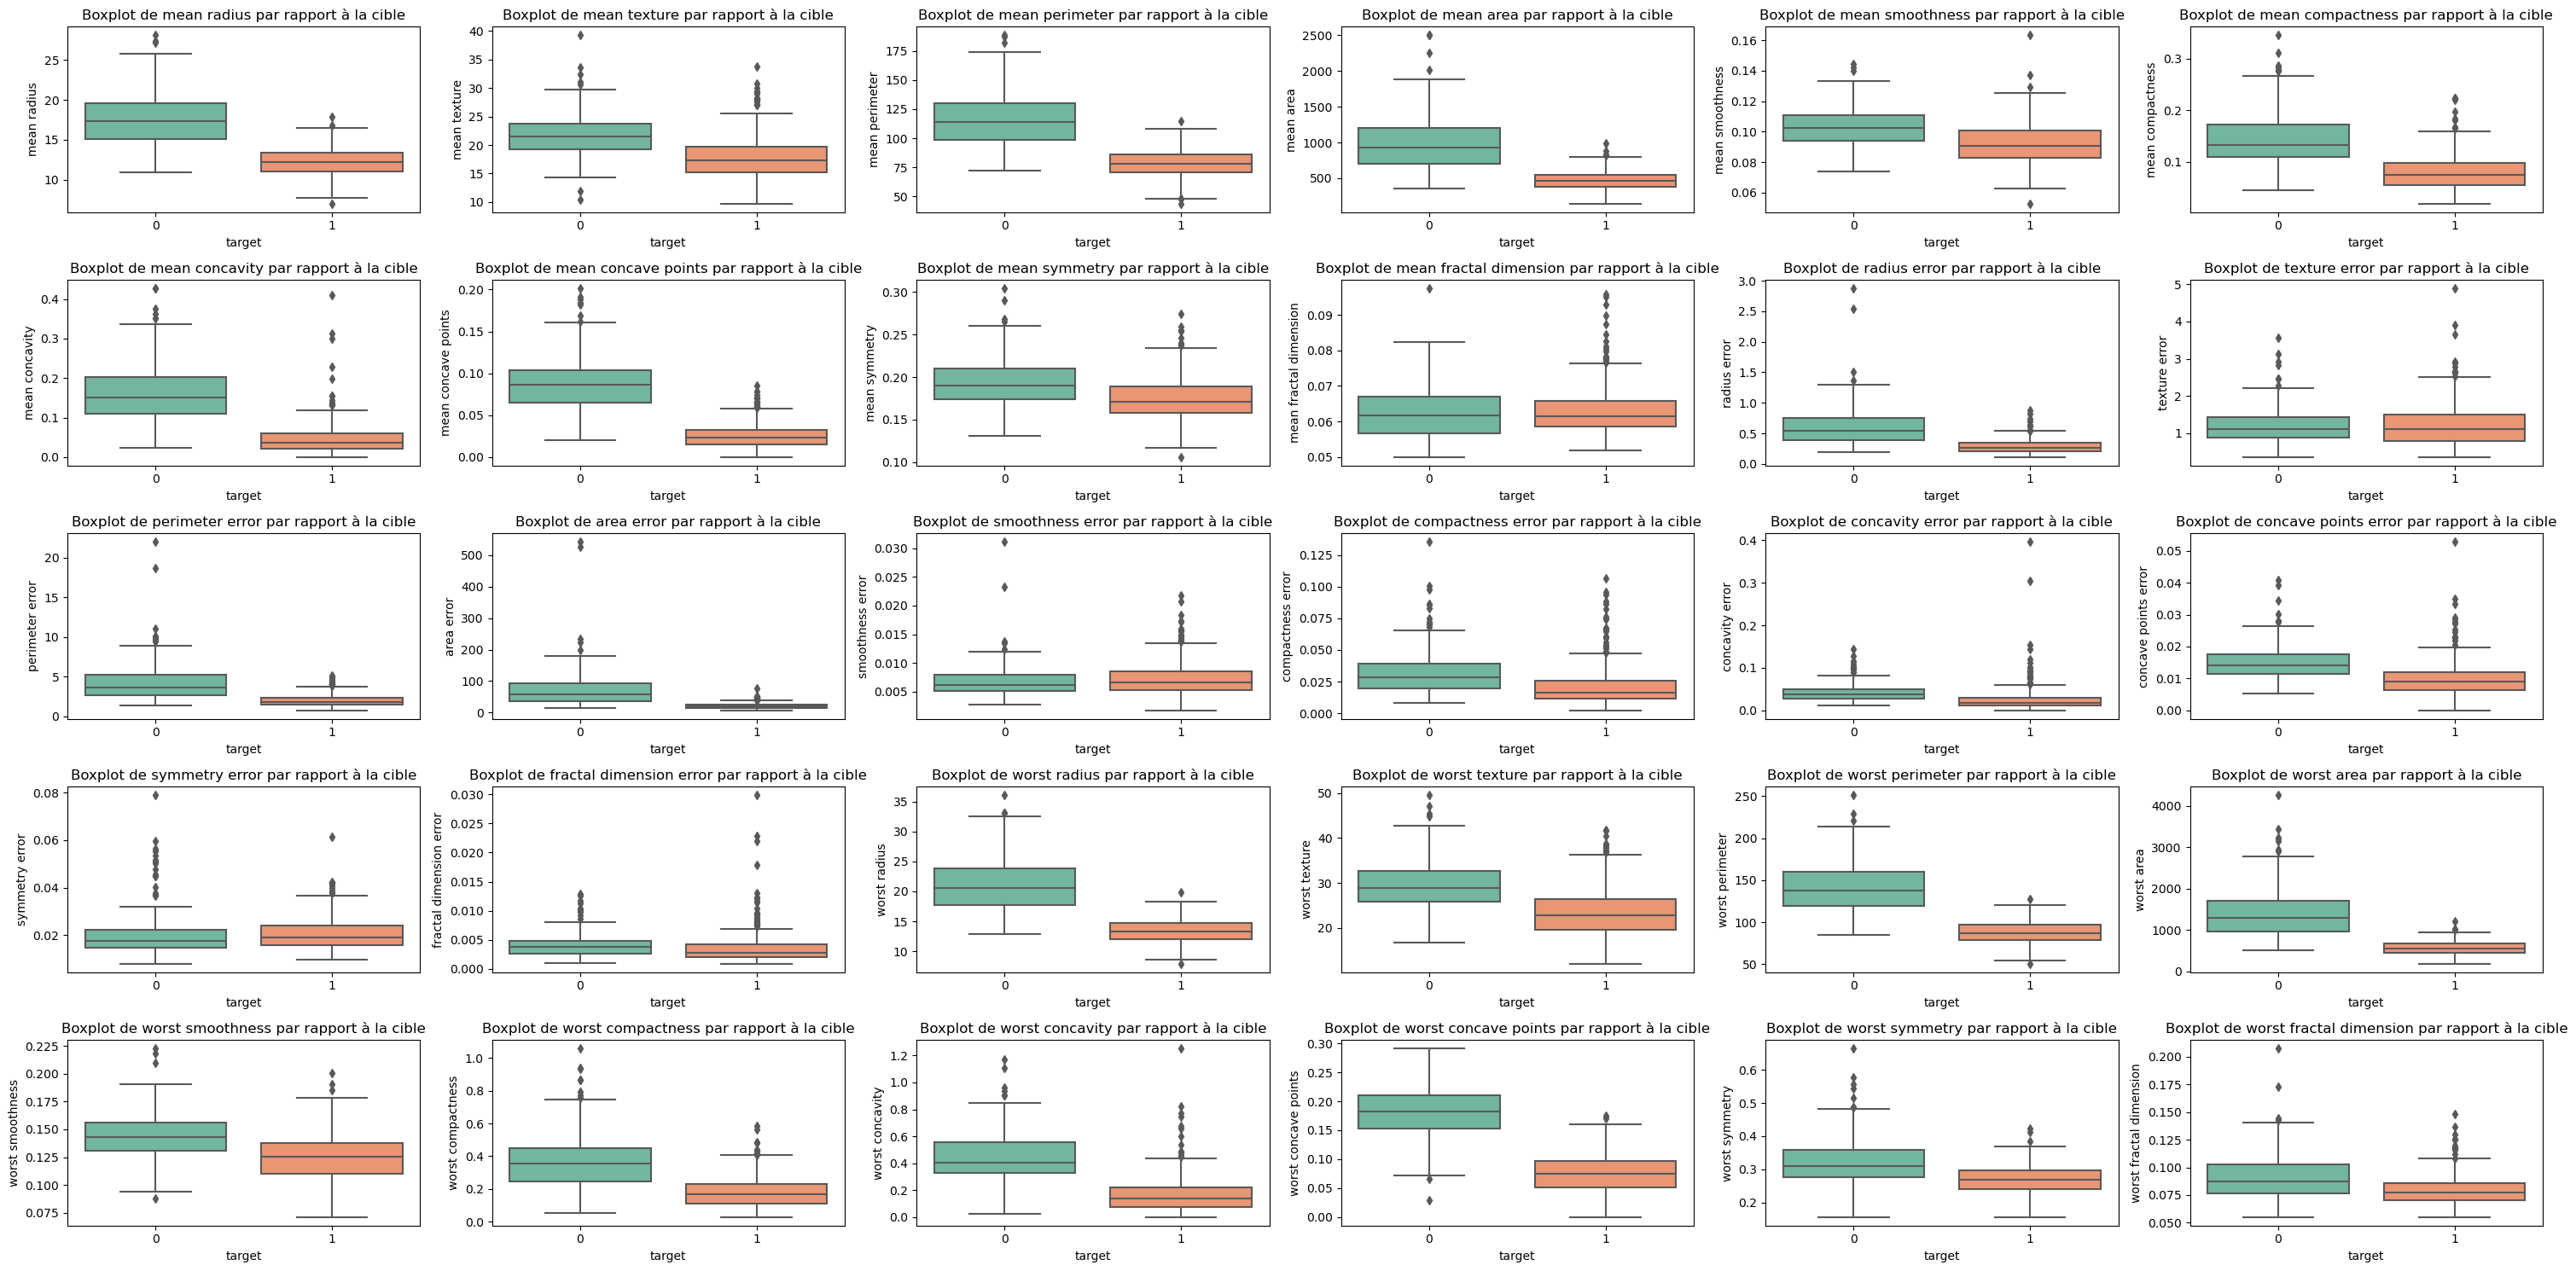

In [17]:
plt.figure(figsize=(30, 15))
for i, column in enumerate(bdd.columns[:-1], 1):  # Exclut la colonne cible
    plt.subplot(5, 6, i)  # Ajuster en fonction du nombre de colonnes
    sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
    plt.title(f"Boxplot de {column} par rapport à la cible")
    plt.tight_layout()
plt.show()

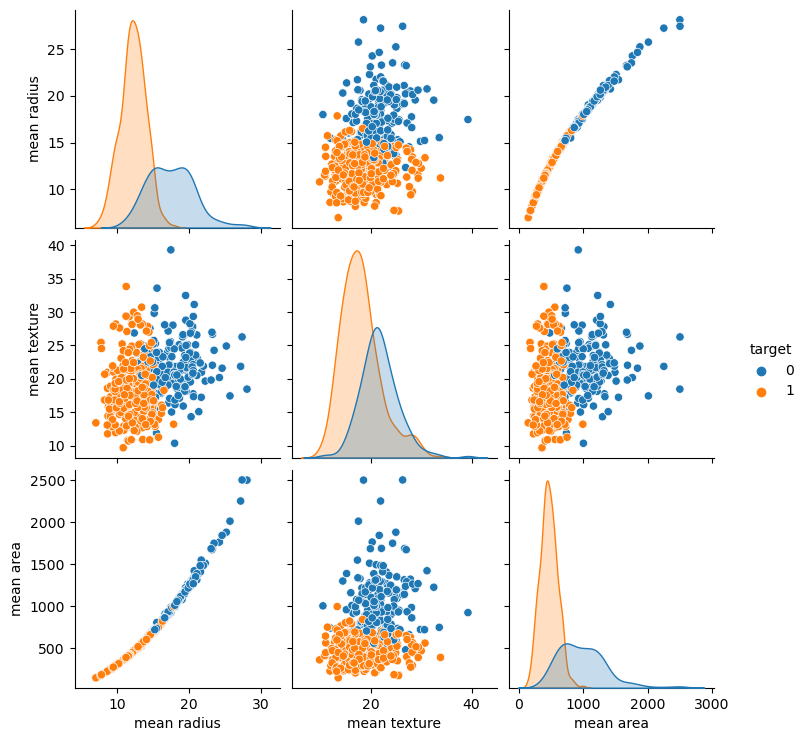

In [18]:
# Visualisation de la relation entre quelques variables et la cible
sns.pairplot(bdd, vars=['mean radius', 'mean texture', 'mean area'], hue='target', diag_kind="kde")
plt.show()

In [19]:
# Calcul des moyennes par classe
bdd.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [20]:
corr = bdd.corr()

corr_target = corr['target']
print(corr_target)

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

Les résultats de la corrélation montrent que certaines variables sont fortement liées à la **target**, en particulier celles associées aux **worst**-type mesures. Par exemple, **worst concave points** (-0.793566) et **worst perimeter** (-0.782914) ont des corrélations négatives très élevées avec la cible, indiquant qu'une augmentation de ces variables est associée à une diminution de la probabilité de la classe cible. D'autres variables, comme **mean concave points** (-0.776614) et **worst radius** (-0.776454), suivent une tendance similaire, suggérant qu'elles ont un impact important sur la prédiction de la cible.

D'autre part, des variables comme **fractal dimension** (0.012838) et **symmetry error** (0.006522) montrent des corrélations très faibles avec la cible, ce qui indique qu'elles n'apportent que peu d'information pour la prédiction. Les variables **mean radius** (-0.730029), **mean perimeter** (-0.742636), et **mean area** (-0.708984) ont des corrélations modérées, ce qui suggère qu'elles contribuent de manière significative mais moins marquée que les variables "worst" dans la prédiction.

###### Statistiques multivariées

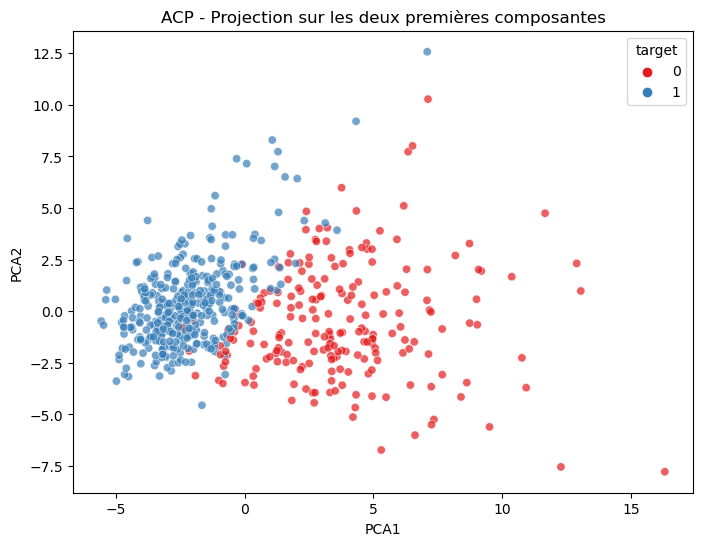

Variance expliquée par les premières composantes : [0.44272026 0.63243208]


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bdd.drop(columns=['target']))

# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des deux premières composantes
pca_bdd = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_bdd['target'] = bdd['target']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_bdd, x='PCA1', y='PCA2', hue='target', palette='Set1', alpha=0.7)
plt.title("ACP - Projection sur les deux premières composantes")
plt.show()

# Variance expliquée
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée par les premières composantes :", explained_variance[:5])

Les deux premières composantes principales expliquent ensemble environ **77,5%** de la variance des données. La première composante capture **44,3%** de la variance, et la deuxième en explique **63,2%**. Cela montre que ces deux composantes sont suffisantes pour représenter une grande partie de l'information contenue dans les données.

#### 3) Recoder les variables si nécessaire


Les variables sont au bon format, il n'est donc pas nécessaire de les recoder.

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

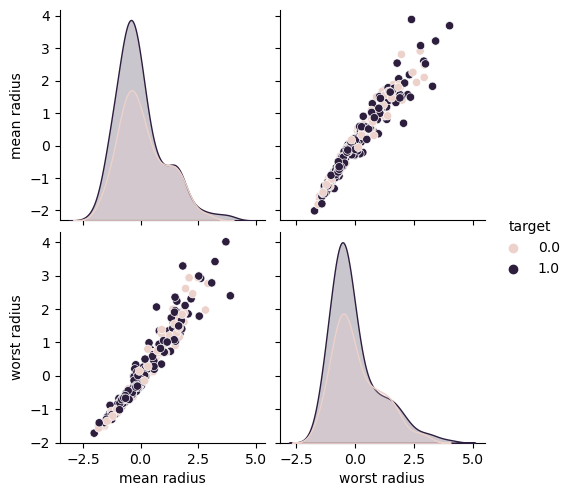

mean radius    -0.061409
worst radius   -0.047279
dtype: float64


In [22]:
# Visualiser les relations entre caractéristiques et cible

sns.pairplot(X_train_scaled[['mean radius', 'worst radius']].assign(target=y_train), hue='target')
plt.show()

# Évaluer la corrélation avec la cible
correlations = X_train_scaled[['mean radius', 'worst radius']].corrwith(y_train)
print(correlations)

- mean radius : moyenne des rayons des noyaux des cellules dans l'image, calculée pour chaque tumeur.
- worst radius : plus grand rayon mesuré parmi toutes les cellules dans une image spécifique

In [23]:
X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

In [24]:
X_train_2_features.count()
X_test_2_features.count()

mean radius     114
worst radius    114
dtype: int64

## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [25]:
#SGD 
sgd_clf = SGDClassifier(random_state=77, max_iter=1000, tol=1e-3)

#SVM avec noyau RBF
svc_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=77)

#Régression logistique
log_reg = LogisticRegression(max_iter=1000, random_state=77)

#Liste des modèles
models = {
    "SGDClassifier": sgd_clf,
    "SVC": svc_clf,
    "LogisticRegression": log_reg
}

for name, model in models.items():
    model.fit(X_train_2_features, y_train) 
    print(f"{name} entraîné avec succès.")

SGDClassifier entraîné avec succès.
SVC entraîné avec succès.
LogisticRegression entraîné avec succès.


In [26]:
#Évaluation des modèles
for name, model in models.items():
    y_pred = model.predict(X_test_2_features)  # Prédictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Précision : {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

SGDClassifier - Précision : 0.90
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        39
           1       0.87      1.00      0.93        75

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.88       114
weighted avg       0.92      0.90      0.90       114

SVC - Précision : 0.93
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

LogisticRegression - Précision : 0.95
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.94 

Les trois modèles de classification, **SGDClassifier**, **SVC**, et **LogisticRegression**, ont montré des performances variables, avec LogisticRegression en tête.

Le **SGDClassifier** présente une précision de 0.90, mais il montre une disparité notable entre les deux classes : un rappel de 1.00 pour la classe 1, mais seulement 0.72 pour la classe 0. Cela suggère que le modèle est particulièrement performant pour détecter la classe 1, mais peine à identifier correctement la classe 0, ce qui pourrait être problématique dans des situations où la classe 0 est plus importante.

Le **SVC**, quant à lui, améliore les résultats avec une précision de 0.93. Les rappels sont plus équilibrés entre les deux classes, avec 0.85 pour la classe 0 et 0.97 pour la classe 1. Le modèle parvient ainsi à mieux gérer la classe 0 tout en maintenant une forte performance pour la classe 1. Le F1-score, qui est une mesure importante de la performance globale, est également meilleur que celui de SGDClassifier, notamment pour la classe 1.

Enfin, **LogisticRegression** surpasse les deux autres modèles avec une précision de 0.95, tout en offrant un bon équilibre dans la prédiction des deux classes. Le rappel pour la classe 0 est de 0.90 et pour la classe 1 de 0.97, ce qui indique une très bonne capacité à prédire à la fois la classe 0 et la classe 1. Le F1-score est également le plus élevé pour les deux classes, confirmant la robustesse du modèle.

En conclusion, **LogisticRegression** est le modèle le plus performant pour cette tâche, offrant une meilleure précision, un meilleur rappel et un meilleur F1-score par rapport à **SVC** et **SGDClassifier**.

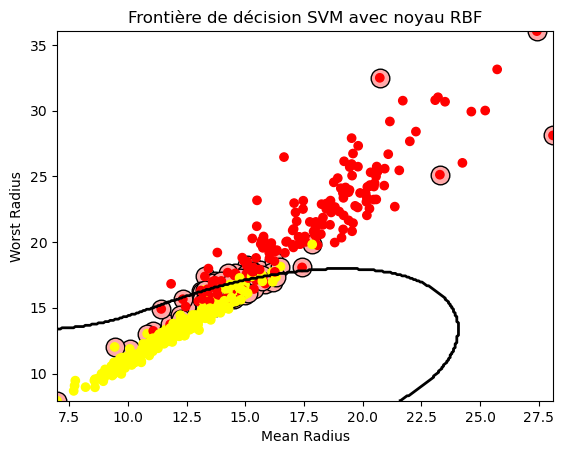

In [27]:
import warnings
warnings.filterwarnings('ignore')

#Entraîner le modèle SVM avec noyau RBF
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_2_features, y_train)

#Fonction pour tracer la frontière de décision pour un SVM avec noyau non linéaire (RBF)
def plot_svc_decision_boundary_rbf(svm_clf, X, xmin, xmax, ymin, ymax):
    #Créer une grille de points pour afficher la frontière de décision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la frontière de décision et les marges
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les vecteurs de support
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')

plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                               X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                               X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())

#Ajouter les données
plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
plt.xlabel('Mean Radius')
plt.ylabel('Worst Radius')
plt.title('Frontière de décision SVM avec noyau RBF')
plt.show()

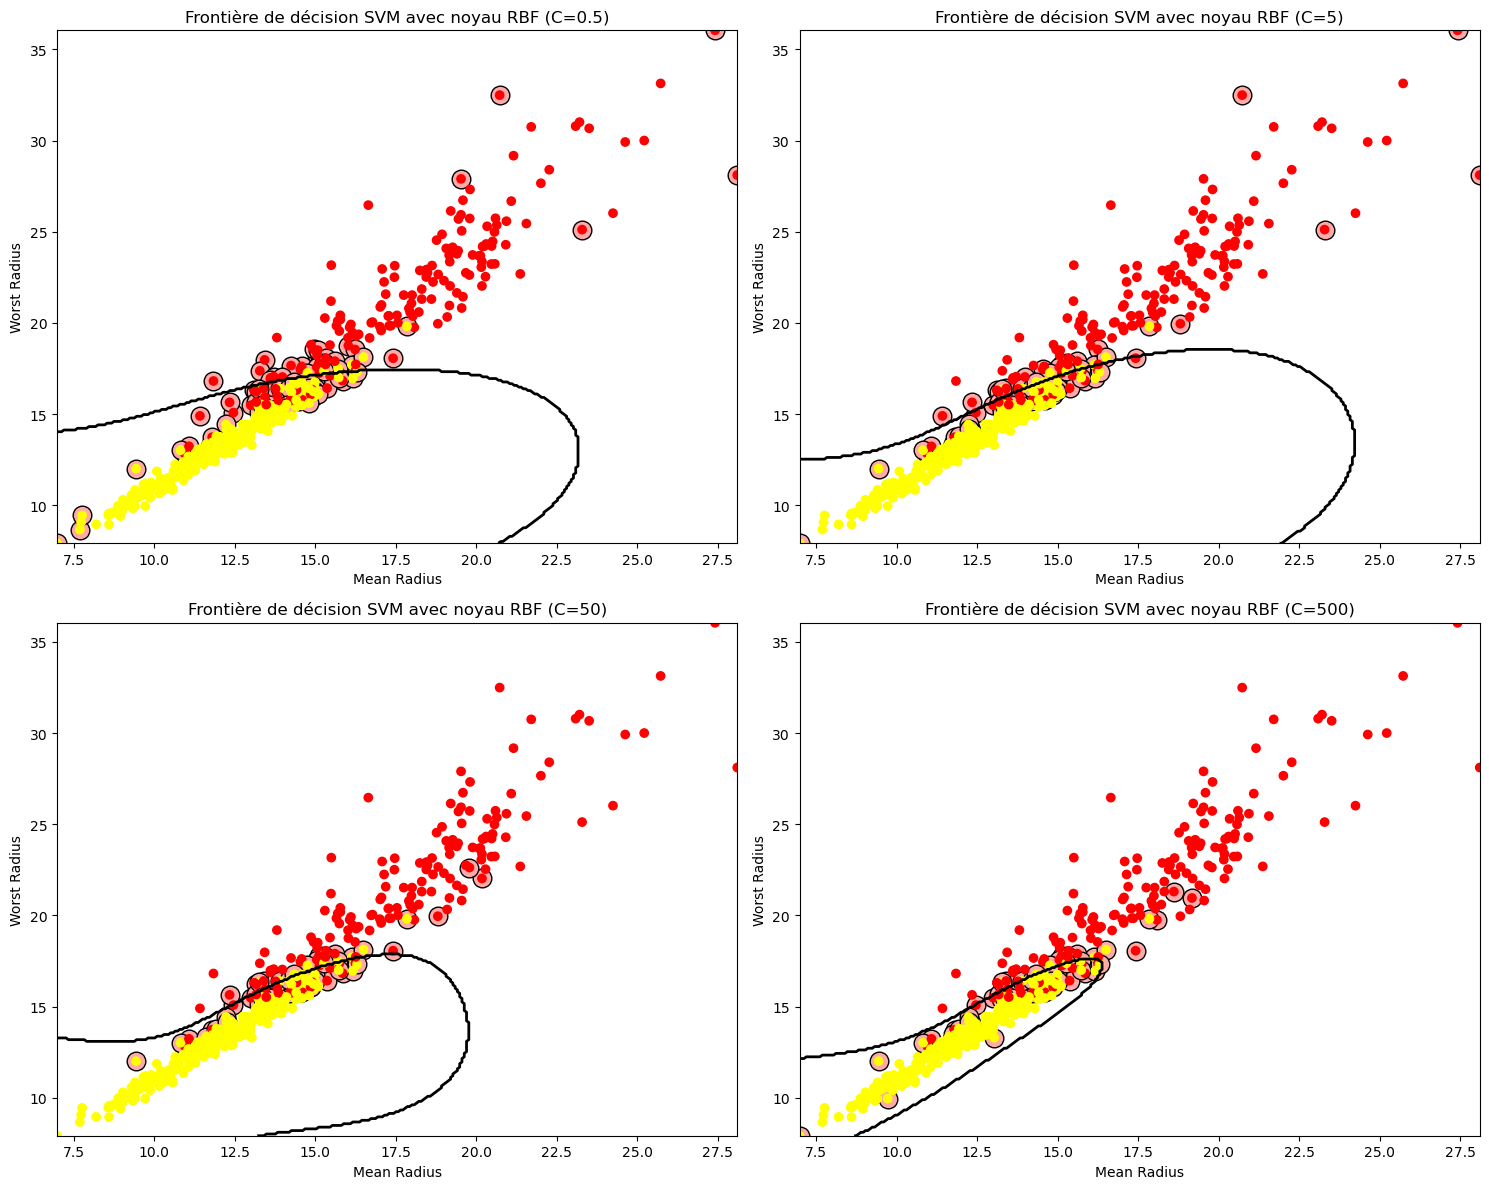

In [28]:
import warnings
warnings.filterwarnings('ignore')

#Liste des valeurs de C à tester
C_values = [0.5, 5, 50, 500]

#Créer une figure pour afficher les frontières de décision
plt.figure(figsize=(15, 12))

#Boucle pour entraîner et afficher les frontières de décision pour chaque valeur de C
for i, C in enumerate(C_values, start=1):
    #Entraîner le modèle SVM avec noyau RBF et la valeur de C
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train_2_features, y_train)

    #Créer un sous-graphique pour chaque valeur de C
    plt.subplot(2, 2, i)
    plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                                   X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                                   X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())
    
    #Ajouter les données
    plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(f'Frontière de décision SVM avec noyau RBF (C={C})')
    
plt.tight_layout()
plt.show()

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

##### 6.1) Garder uniquement **2 features** pour cette partie

mean radius et worst radius

##### 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau

Nous testons les différents noyaux (linear, poly, rbf, sigmoid).

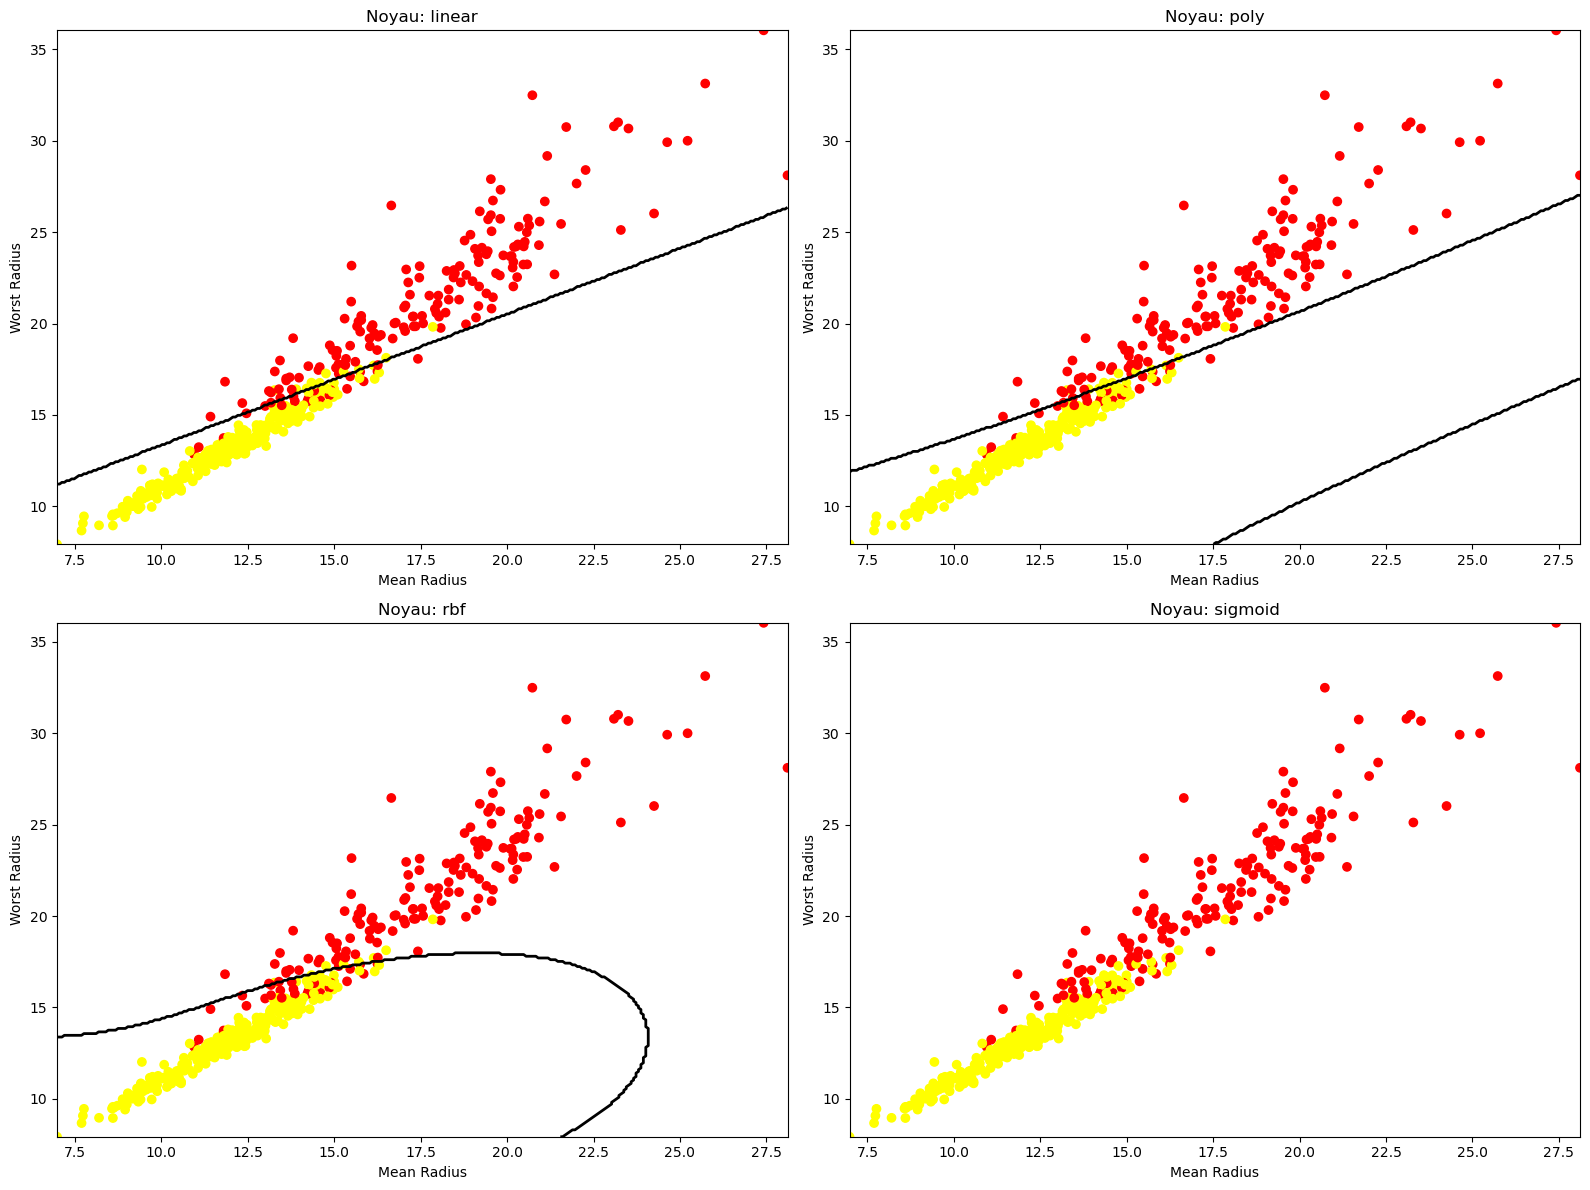

In [29]:
import warnings
warnings.filterwarnings('ignore')

#Fonction pour tracer la frontière de décision et les prédictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):
    
    #Créer une grille de points pour afficher la frontière de décision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la frontière de décision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les points de données
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #Les différents noyaux 

plt.figure(figsize=(16, 12))

#Boucle
for i, kernel in enumerate(kernels, start=1):
  
    model = SVC(kernel=kernel, C=1, gamma='scale', random_state=77)
    model.fit(X_train_2_features, y_train)

    plt.subplot(2, 2, i)
    plot_predictions(model, X_train_2_features, 
                     X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                     X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                     f'Noyau: {kernel}')

plt.tight_layout()
plt.show()

##### 6.3) Varier les autres hyperparamètres en plus du kernel

Nous testons différentes valeurs de C et gamma pour chaque noyau (linear, poly, rbf, sigmoid).

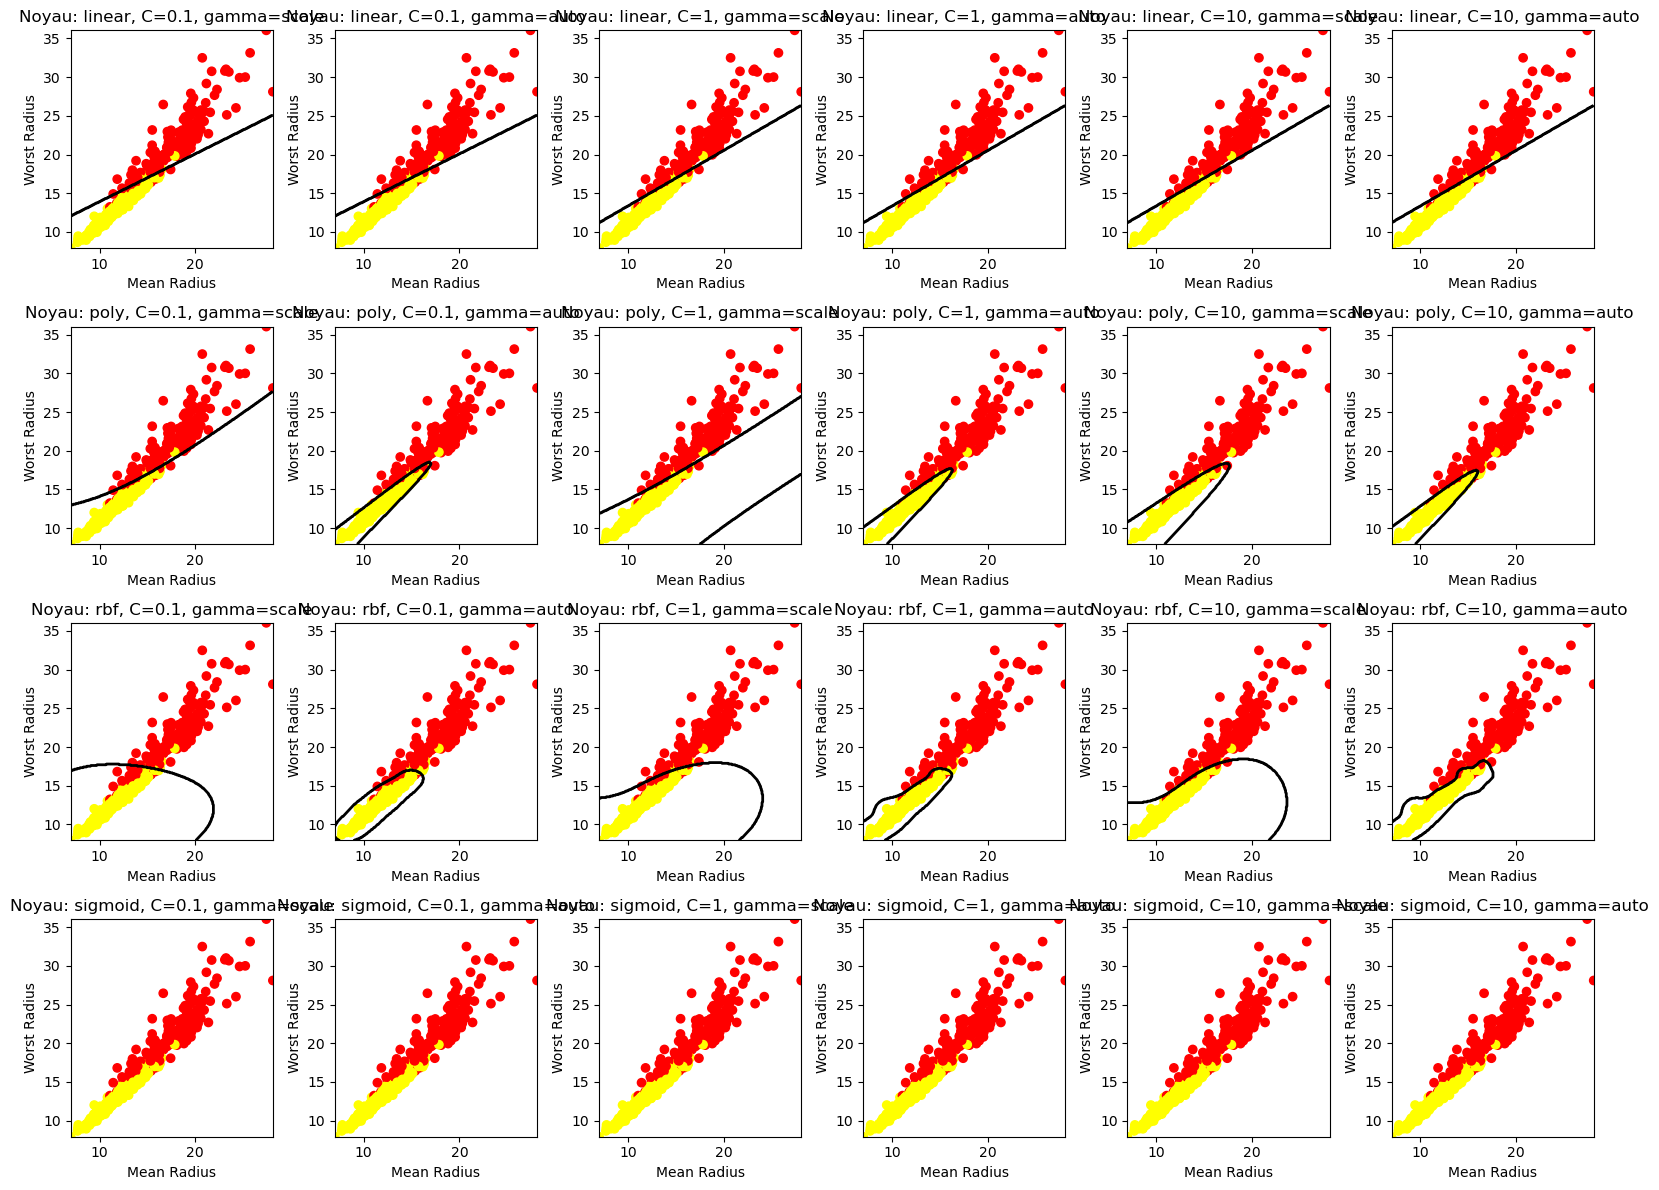

In [30]:
import warnings
warnings.filterwarnings('ignore')

#Fonction pour tracer la frontière de décision et les prédictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la frontière de décision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les points de données
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

#Liste des valeurs d'hyperparamètres à tester
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

# Calculer le nombre total de sous-graphes nécessaires
num_subplots = len(kernels) * len(C_values) * len(gamma_values)

# Créer une figure pour afficher les frontières de décision pour chaque combinaison de noyau, C et gamma
plt.figure(figsize=(16, 12))

#Boucle 
index = 1
for i, kernel in enumerate(kernels, start=1):
    for j, C in enumerate(C_values):
        for k, gamma in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=77)
            model.fit(X_train_2_features, y_train)

            plt.subplot(len(kernels), len(C_values) * len(gamma_values), index)
            plot_predictions(model, X_train_2_features, 
                             X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                             X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                             f'Noyau: {kernel}, C={C}, gamma={gamma}')

            #Incrémenter l'index pour le sous-graphique suivant
            index += 1

plt.tight_layout()
plt.show()

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

- mean texture : mesure de l'homogénéité de la texture des noyaux cellulaires.
- mean smoothness : mesure de la douceur des contours de la tumeur.
- mean compactness : mesure de la compacité (forme arrondie ou irrégulière) de la tumeur.
- mean concavity : mesure de la concavité (indentations) des bords de la tumeur.
- mean concave points : nombre de points concaves sur les bords de la tumeur.
- worst texture : texture la plus hétérogène observée dans l'image.
- worst perimeter : périmètre le plus grand des noyaux des cellules de la tumeur.
- worst area : aire la plus grande des cellules tumorales dans l'image.

Ces variables sont utilisées pour évaluer la taille, la forme et la texture des tumeurs, et aident à déterminer leur malignité.

In [31]:
features_selected = [
    'mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 
    'mean concavity', 'mean concave points', 'worst radius', 
    'worst texture', 'worst perimeter', 'worst area'
]

X_selected = bdd[features_selected]  
y = bdd['target'] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=77)

Accuracy for linear kernel: 0.9561
Accuracy for rbf kernel: 0.9386
Accuracy for poly kernel: 0.8947
Accuracy for sigmoid kernel: 0.9386


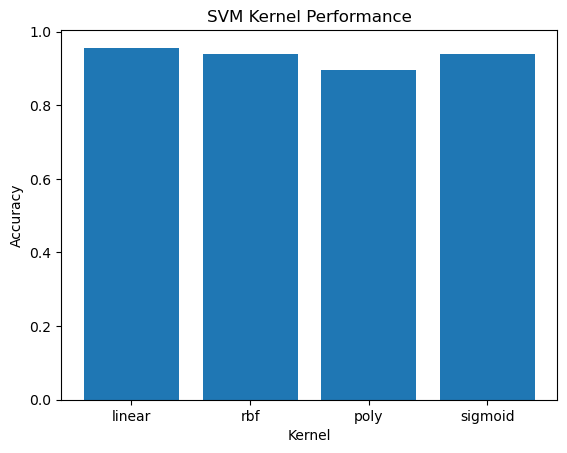

In [32]:
#Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

#Créer un dictionnaire pour stocker les modèles et leurs performances
results = {}

#Entraîner les modèles SVM avec différents noyaux
for kernel in kernels:

    model = SVC(kernel=kernel, random_state=77)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[kernel] = accuracy

    print(f"Accuracy for {kernel} kernel: {accuracy:.4f}")

#Graphique des résultats
plt.bar(results.keys(), results.values())
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance')
plt.show()


Les performances des différents noyaux dans le modèle SVM varient considérablement, avec le noyau linéaire offrant la meilleure précision de **0.9561**. Cela suggère que les données sont bien adaptées à une séparation linéaire, et que ce noyau est donc le plus efficace dans ce cas. En revanche, le noyau RBF, qui est généralement choisi pour sa capacité à capturer des relations non linéaires, donne une précision de **0.9386**, restant compétitif, mais légèrement moins performant que le noyau linéaire. Le noyau polynomial, avec une précision de **0.8947**, offre des résultats moins satisfaisants, probablement en raison d'une complexité inutile qui n'améliore pas la performance sur ce jeu de données spécifique. Enfin, le noyau sigmoïde, avec une précision de **0.938**, présente des résultats similaires à ceux du noyau RBF. 

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

Cross-validation score for SVC (linear): 0.9701
Cross-validation score for SVC (rbf): 0.9736
Cross-validation score for SVC (poly): 0.8981
Cross-validation score for SVC (sigmoid): 0.9596
Cross-validation score for SGDClassifier: 0.9613
Cross-validation score for LogisticRegression: 0.9807


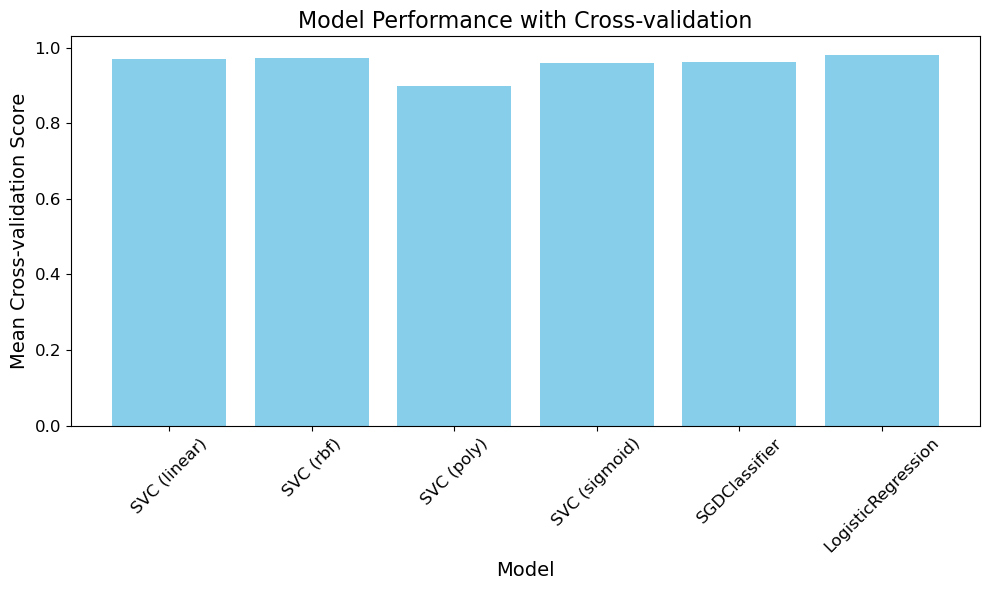

In [33]:
#Liste des modèles à tester
models = {
    "SVC (linear)": SVC(kernel='linear', random_state=77),
    "SVC (rbf)": SVC(kernel='rbf', random_state=77),
    "SVC (poly)": SVC(kernel='poly', random_state=77),
    "SVC (sigmoid)": SVC(kernel='sigmoid', random_state=77),
    "SGDClassifier": SGDClassifier(random_state=77, max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=77)
}

#Dictionnaire pour stocker les résultats
results = {}

#Effectuer la cross-validation pour chaque modèle
for name, model in models.items():
    #Calculer les scores de cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)  #5 folds
    results[name] = cv_scores.mean()  #Moyenne des scores

    print(f"Cross-validation score for {name}: {results[name]:.4f}")

plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Cross-validation Score', fontsize=14)
plt.title('Model Performance with Cross-validation', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()

Les résultats de la validation croisée montrent que **Logistic Regression** est le modèle le plus performant avec un score de **0.9807**, ce qui indique qu'il s'adapte bien aux données et génère des prédictions précises. Le **SVC avec noyau RBF** suit de près avec un score de **0.9736**, démontrant son efficacité à capturer des relations non linéaires. Le **SVC avec noyau linéaire** atteint également une bonn eperformance de **0.9701**, prouvant qu'un modèle linéaire fonctionne bien pour ce problème. En revanche, **SGDClassifier** et **SVC avec noyau sigmoïde** montrent des scores plus modestes de **0.9613** et **0.9596** respectivement. Enfin, le **SVC avec noyau polynomial** obtient le score le plus bas de **0.8981**, suggérant que sa complexité supplémentaire n'apporte pas d'amélioration significative sur ce jeu de données.

#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)


Matrice de Confusion pour SVC (linear):


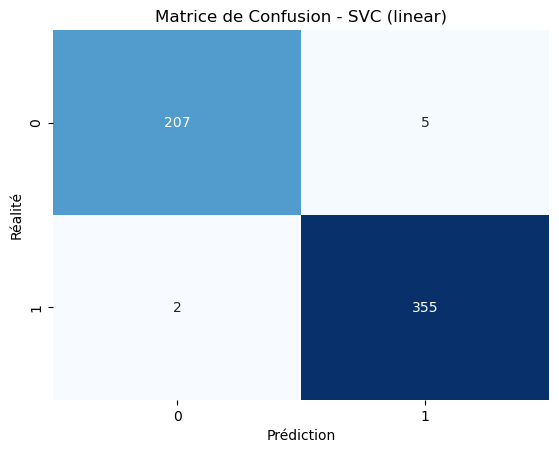

Rapport de classification pour SVC (linear):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
Échantillon des indices mal classés: [ 40  73 135 263 297 413 541]
Score moyen de validation croisée pour SVC (linear): 0.9701

Matrice de Confusion pour SVC (rbf):


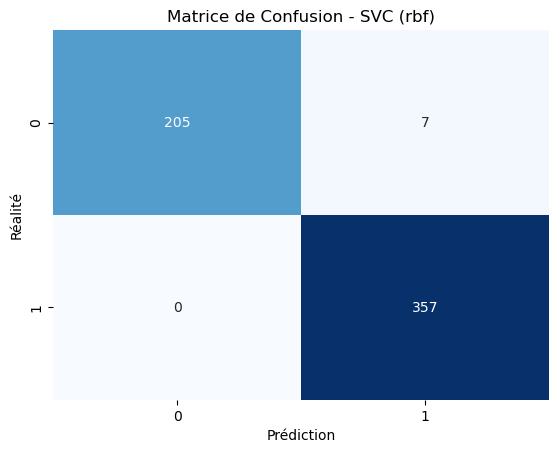

Rapport de classification pour SVC (rbf):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.98      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
Échantillon des indices mal classés: [ 40  73 135 255 263 297 514]
Score moyen de validation croisée pour SVC (rbf): 0.9736

Matrice de Confusion pour SVC (poly):


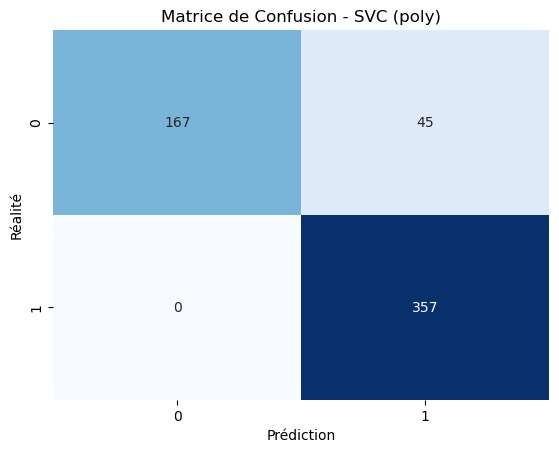

Rapport de classification pour SVC (poly):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       212
           1       0.89      1.00      0.94       357

    accuracy                           0.92       569
   macro avg       0.94      0.89      0.91       569
weighted avg       0.93      0.92      0.92       569

Nombre d'erreur: 45
Échantillon des indices mal classés: [10 13 16 29 36 39 40 41 43 44]
Score moyen de validation croisée pour SVC (poly): 0.8981

Matrice de Confusion pour SVC (sigmoid):


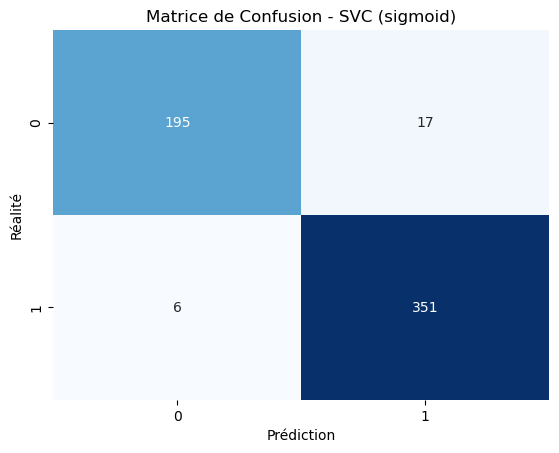

Rapport de classification pour SVC (sigmoid):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       212
           1       0.95      0.98      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.96       569
weighted avg       0.96      0.96      0.96       569

Nombre d'erreur: 23
Échantillon des indices mal classés: [ 13  38  40  68  73  86  91  99 135 146]
Score moyen de validation croisée pour SVC (sigmoid): 0.9596

Matrice de Confusion pour SGDClassifier:


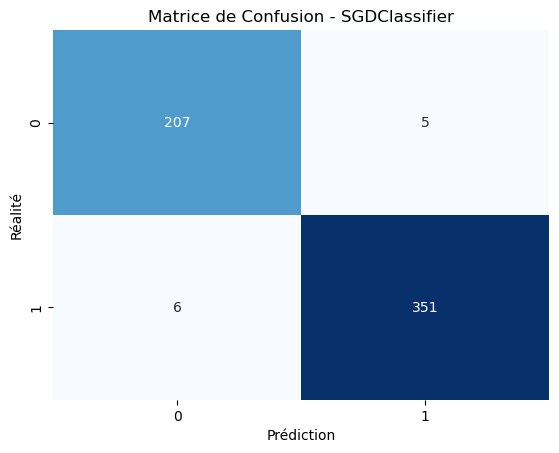

Rapport de classification pour SGDClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       212
           1       0.99      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

Nombre d'erreur: 11
Échantillon des indices mal classés: [ 40  73 135 238 263 297 363 413 455 469]
Score moyen de validation croisée pour SGDClassifier: 0.9613

Matrice de Confusion pour LogisticRegression:


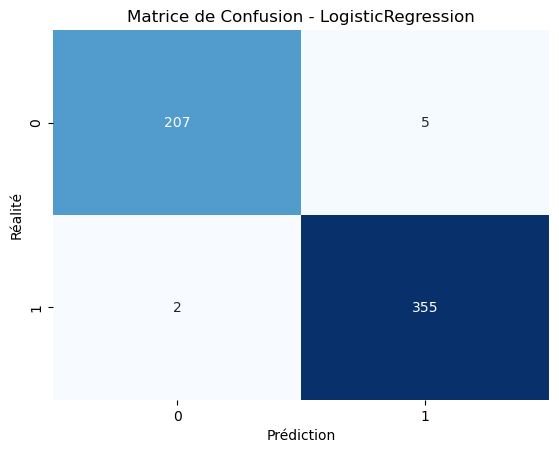

Rapport de classification pour LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
Échantillon des indices mal classés: [ 40  73 135 263 297 413 541]
Score moyen de validation croisée pour LogisticRegression: 0.9807


In [34]:
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    
    cm = confusion_matrix(y, y_pred)
    print(f"\nMatrice de Confusion pour {name}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matrice de Confusion - {name}")
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')
    plt.show()
    
    print(f"Rapport de classification pour {name}:")
    print(classification_report(y, y_pred))
    
    errors = np.where(y != y_pred)[0]
    print(f"Nombre d'erreur: {len(errors)}")
    print(f"Échantillon des indices mal classés: {errors[:10]}")  
    

    print(f"Score moyen de validation croisée pour {name}: {results[name]:.4f}")


1. **SVC (Noyau Linéaire)** :  
Le modèle SVC avec noyau linéaire a montré d'excellentes performances avec une précision et un rappel proches de 1. Il a commis 7 erreurs, avec un score de validation croisée de 0.9701. Ce modèle est très stable et performant.

2. **SVC (Noyau RBF)** :  
Le modèle SVC avec noyau RBF a aussi très bien performé, avec une précision de 1.00 pour la classe 0 et 0.98 pour la classe 1. Il a également commis 7 erreurs et a obtenu un score de validation croisée de 0.9736, légèrement meilleur que le noyau linéaire. Ce modèle est très performant pour modéliser les relations non linéaires.

3. **SVC (Noyau Polynomial)** :  
Le noyau polynomial a montré des performances inférieures, avec une précision globale de 0.92 et 45 erreurs. Ce modèle semble moins adapté à ces données, avec un score de validation croisée de 0.8981. Il a des difficultés à généraliser les relations complexes dans les données.

4. **SVC (Noyau Sigmoïde)** :  
Le modèle avec noyau sigmoïde présente une précision globale de 0.96 et a commis 23 erreurs. Son score de validation croisée est de 0.9596, ce qui est inférieur à celui des modèles linéaire et RBF. Ce modèle est performant mais moins stable.

5. **SGDClassifier** :  
Le SGDClassifier affiche une précision de 0.97 pour la classe 0 et de 0.99 pour la classe 1. Avec un score de validation croisée de 0.9613 et 11 erreurs, ce modèle est une option rapide mais légèrement moins stable que les SVC linéaire et RBF.

6. **Logistic Regression** :  
La régression logistique a montré des résultats similaires aux modèles SVC, avec une précision de 0.99 et un score de validation croisée de 0.9807, le meilleur des modèles testés. Elle a commis 7 erreurs, offrant ainsi une bonne stabilité.


Les modèles **SVC (Noyau Linéaire)**, **SVC (Noyau RBF)**, et **Logistic Regression** se démarquent par leurs performances élevées, leur stabilité et leur faible nombre d'erreurs. Le choix entre ces modèles dépend des besoins spécifiques :
- **SVC (Noyau RBF)** est légèrement meilleur en validation croisée et performant pour des relations non linéaires.
- **Logistic Regression** est rapide, interprétable et très performant.
- **SVC (Noyau Linéaire)** offre des performances globales similaires tout en étant simple et efficace.

En revanche, les modèles **SVC (Noyau Polynomial)** et **SVC (Noyau Sigmoïde)** ont montré des limitations sur ces données et ne sont pas recommandés pour ce problème. Le **SGDClassifier**, bien qu'efficace, est légèrement moins performant que les meilleurs modèles testés.

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [35]:
#Paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

#Initialisation du modèle SVC
svc = SVC(kernel='rbf')

#GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_2_features, y_train)

#Meilleur modèle trouvé
best_svc = grid_search_svc.best_estimator_

print("Meilleur modèle SVC (RBF):", grid_search_svc.best_params_)

Meilleur modèle SVC (RBF): {'C': 1, 'gamma': 'auto'}


In [36]:
best_svc = SVC(kernel='rbf', C=1, gamma='auto')

best_svc.fit(X_train_2_features, y_train)

y_pred = best_svc.predict(X_test_2_features)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [37]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC(kernel='linear')

grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_2_features, y_train)

best_svc = grid_search_svc.best_estimator_

print("Meilleur modèle SVC (linear):", grid_search_svc.best_params_)

Meilleur modèle SVC (linear): {'C': 10, 'gamma': 'scale'}


In [38]:
best_svc2 = SVC(kernel='linear', C=10, gamma='scale')

best_svc2.fit(X_train_2_features, y_train)

y_pred = best_svc2.predict(X_test_2_features)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [39]:
import warnings
warnings.filterwarnings('ignore')

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression()

grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_2_features, y_train)

best_lr = grid_search_lr.best_estimator_

print("Meilleur modèle LogisticRegression:", grid_search_lr.best_params_)

Meilleur modèle LogisticRegression: {'C': 10, 'solver': 'liblinear'}


In [40]:
best_log_reg = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=77)

best_log_reg.fit(X_train_2_features, y_train)

y_pred_log_reg = best_log_reg.predict(X_test_2_features)

print("Classification Report pour LogisticRegression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report pour LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Les modèles **SVC (Noyau Linéaire)** et **Logistic Regression** sont équivalents en termes de performance sur ce jeu de données, tous deux atteignant une précision globale de 95 %. Cependant, la **régression logistique** est préférée pour sa rapidité, sa simplicité et son interprétabilité. Elle constitue le meilleur choix pour ce problème de classification du cancer du sein.

In [41]:
y_pred = best_log_reg.predict(X_test_2_features)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [43]:
y_pred = best_svc2.predict(X_test_2_features)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Les deux modèles offrent des résultats identiques en termes de performances.

L'objectif de prédire le cancer du sein à partir de deux caractéristiques principales a été atteint avec succès. Parmi les modèles testés, **Logistic Regression** et **SVC (Linear)** ont obtenu les meilleures performances, avec une précision globale de **95 %** et des F1-scores élevés pour les deux classes (0 et 1). Étant donné des performances similaires, la **régression logistique** est recommandée pour ce problème en raison de sa simplicité, de sa rapidité, et de sa capacité à fournir une interprétation claire des résultats. Ce modèle est donc particulièrement adapté pour des applications nécessitant à la fois efficacité et lisibilité des résultats.

<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>

Oui, avec l'aide des modèles prédictifs et des données pertinentes, je suis désormais capable d'identifier efficacement la présence d'un cancer ! 🩺📊